In [1]:
import os
print("Current working directory:", os.getcwd())
print("Files in this folder:", os.listdir())


Current working directory: C:\Users\adith\Desktop\DA Project\Predicting car price
Files in this folder: ['.ipynb_checkpoints', 'CAR DETAILS FROM CAR DEKHO.csv', 'Untitled.ipynb']


In [3]:
%pip install pandas numpy matplotlib seaborn scikit-learn plotly


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.width',120)
%matplotlib inline

data = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

print("dataset loaded successfully\n")
print("shape of dataset",data.shape)
print("\ncolumn names:\n", data.columns.tolist())
print("\nFirst 5 rows:\n")
display(data.head(5))


dataset loaded successfully

shape of dataset (4340, 8)

column names:
 ['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']

First 5 rows:



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
print("data types:\n")
print(data.dtypes)
print("\nMissing Values:\n")
print(data.isnull().sum())
print("\nDuplicate rows: ",data.duplicated().sum())
print("\nStatistical Summary:\n")
display(data.describe())


data types:

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

Missing Values:

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Duplicate rows:  763

Statistical Summary:



,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [7]:
# Drop duplicates
data = data.drop_duplicates()
data.columns = data.columns.str.strip().str.lower()
# Create new feature: car_age
current_year = 2020  # last year present in dataset
data['car_age'] = current_year - data['year']

# Drop columns we don't need
data.drop(columns=['name', 'year'],inplace=True)

# Reset index
data.reset_index(drop=True, inplace=True)

# Verify the cleaned dataset
print("✅ Data cleaned successfully!\n")
print("Shape after cleaning:", data.shape)
print("\nColumns:", data.columns.tolist())
print("\nFirst 5 rows:\n")
display(data.head(5))


✅ Data cleaned successfully!

Shape after cleaning: (3577, 7)

Columns: ['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'car_age']

First 5 rows:



,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,60000,70000,Petrol,Individual,Manual,First Owner,13
1,135000,50000,Petrol,Individual,Manual,First Owner,13
2,600000,100000,Diesel,Individual,Manual,First Owner,8
3,250000,46000,Petrol,Individual,Manual,First Owner,3
4,450000,141000,Diesel,Individual,Manual,Second Owner,6


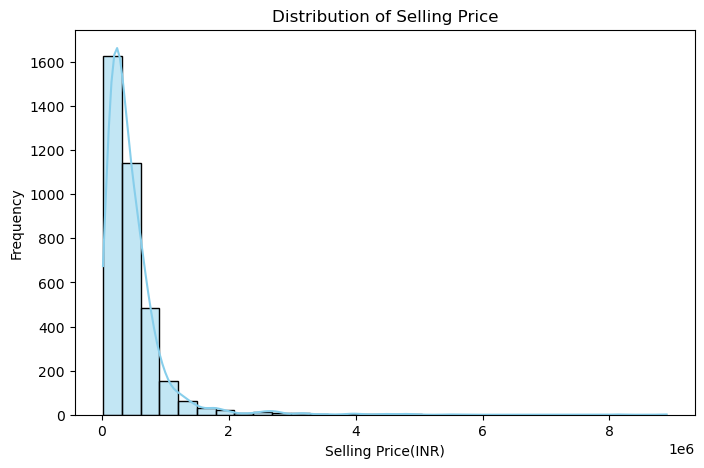

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(data['selling_price'],kde=True,bins=30,color='skyblue')
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price(INR)")
plt.ylabel("Frequency")
plt.show()


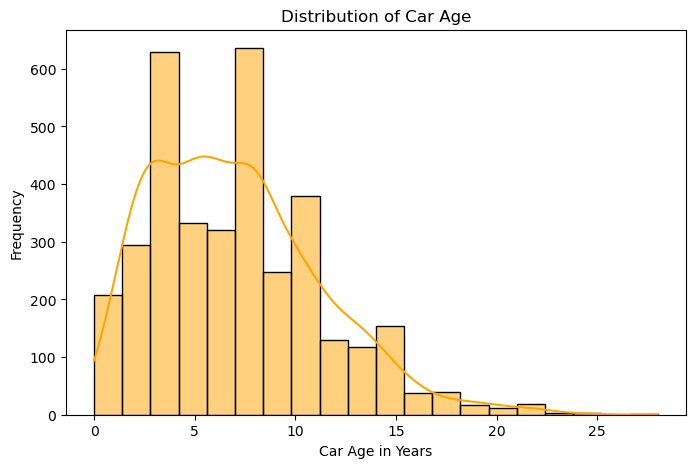

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(data['car_age'],kde=True,bins=20,color='Orange')
plt.title("Distribution of Car Age")
plt.xlabel("Car Age in Years")
plt.ylabel("Frequency")
plt.show()


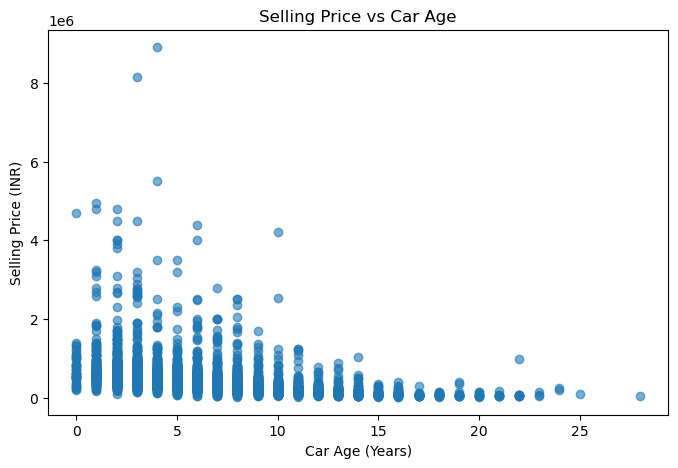

In [19]:
plt.figure(figsize=(8,5))
plt.scatter(x='car_age',y='selling_price',data=data,alpha=0.6)
plt.title("Selling Price vs Car Age")
plt.xlabel("Car Age (Years)")
plt.ylabel("Selling Price (INR)")
plt.show()


C:\Users\adith\AppData\Local\Temp\ipykernel_50276\2817788776.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fuel', y='selling_price', data=data, palette='Set2')


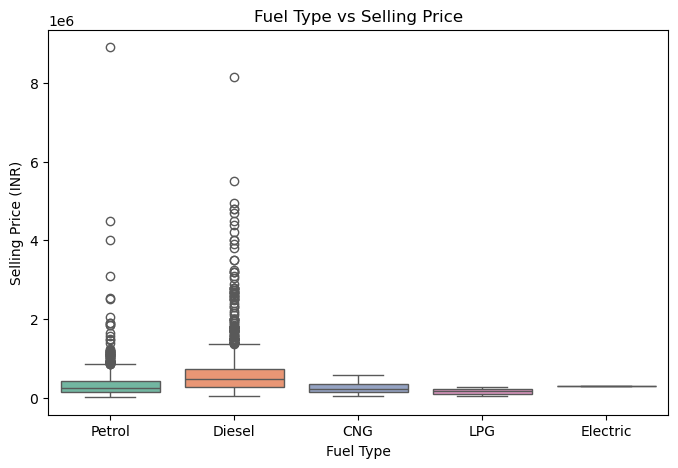

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x='fuel', y='selling_price', data=data, palette='Set2')
plt.title("Fuel Type vs Selling Price")
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price (INR)")
plt.show()


In [23]:
import warnings
warnings.filterwarnings("ignore")


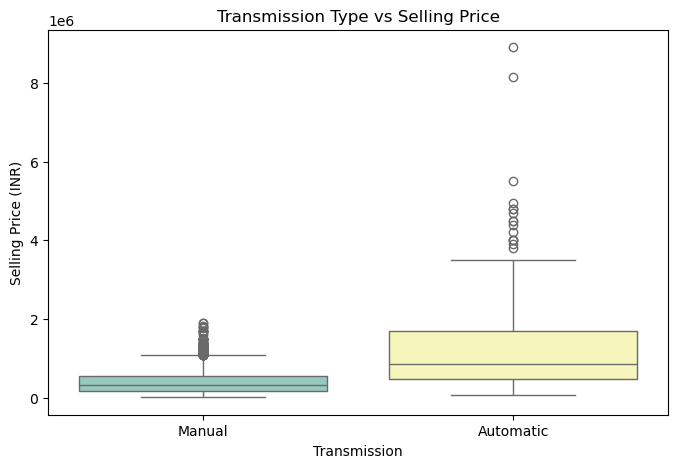

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x='transmission', y='selling_price', data=data, palette='Set3')
plt.title("Transmission Type vs Selling Price")
plt.xlabel("Transmission")
plt.ylabel("Selling Price (INR)")
plt.show()


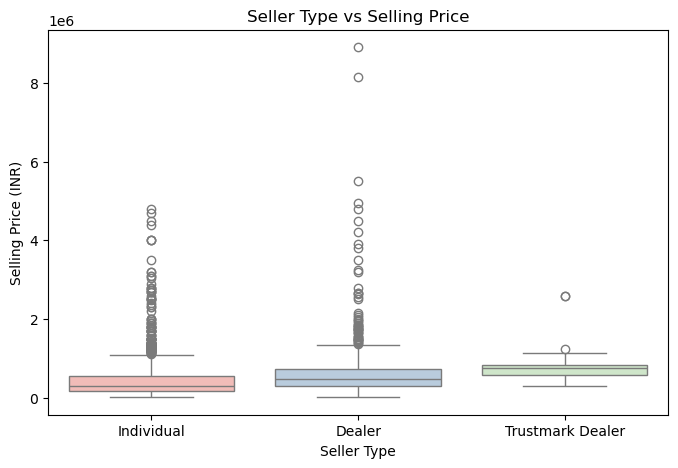

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x='seller_type', y='selling_price', data=data, palette='Pastel1')
plt.title("Seller Type vs Selling Price")
plt.xlabel("Seller Type")
plt.ylabel("Selling Price (INR)")
plt.show()


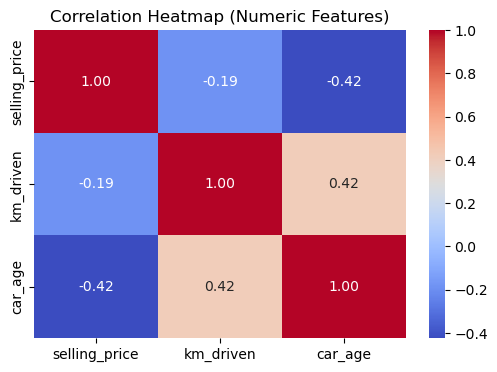

In [29]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [31]:
data.corr(numeric_only=True)


,selling_price,km_driven,car_age
selling_price,1.000000,-0.187359,-0.42426
km_driven,-0.187359,1.000000,0.41749
car_age,-0.424260,0.417490,1.00000


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Copy the data so original stays safe
df = data.copy()

# Encode categorical columns (convert text → numbers)
le = LabelEncoder()
for col in ['fuel', 'seller_type', 'transmission', 'owner']:
    df[col] = le.fit_transform(df[col])

# Separate features (X) and target (y)
X = df.drop('selling_price', axis=1)
y = df['selling_price']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data ready for modeling")
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)



✅ Data ready for modeling
Train shape: (2861, 6) Test shape: (716, 6)


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Initialize & train
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("📈 Linear Regression Performance")
print("R² Score:", round(r2, 3))
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))


📈 Linear Regression Performance
R² Score: 0.386
MAE: 215522.46
RMSE: 444855.79


In [37]:

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest Performance")
print("R² Score:", round(r2_rf, 3))
print("MAE:", round(mae_rf, 2))
print("RMSE:", round(rmse_rf, 2))


Random Forest Performance
R² Score: 0.451
MAE: 194169.71
RMSE: 420376.68


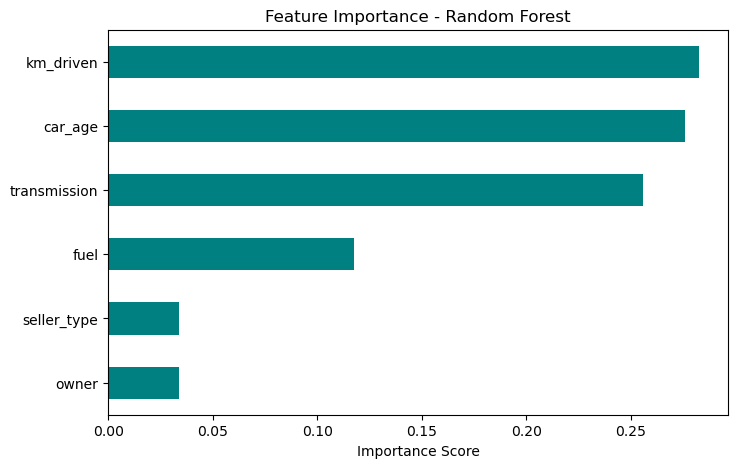

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)
plt.figure(figsize=(8,5))
feat_imp.plot(kind='barh', color='teal')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.show()


In [41]:
import joblib

# Save model
joblib.dump(rf, 'car_price_model.pkl')

print("✅ Model saved successfully as car_price_model.pkl")


✅ Model saved successfully as car_price_model.pkl


In [43]:
def predict_price(km_driven, car_age, fuel, seller_type, transmission, owner):
    # Encode categorical inputs using same label encoder as training
    fuel = le.fit(data['fuel']).transform([fuel])[0]
    seller_type = le.fit(data['seller_type']).transform([seller_type])[0]
    transmission = le.fit(data['transmission']).transform([transmission])[0]
    owner = le.fit(data['owner']).transform([owner])[0]

    sample = pd.DataFrame([[km_driven, fuel, seller_type, transmission, owner, car_age]],
                          columns=X.columns)
    predicted_price = rf.predict(sample)[0]
    return round(predicted_price, 2)

# Example test
price = predict_price(50000, 5, 'Petrol', 'Individual', 'Manual', 'First Owner')
print("Estimated Selling Price (₹):", price)


Estimated Selling Price (₹): 537236.83


In [45]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
results.to_csv('model_predictions.csv', index=False)
print("📁 Exported predictions to model_predictions.csv")


📁 Exported predictions to model_predictions.csv


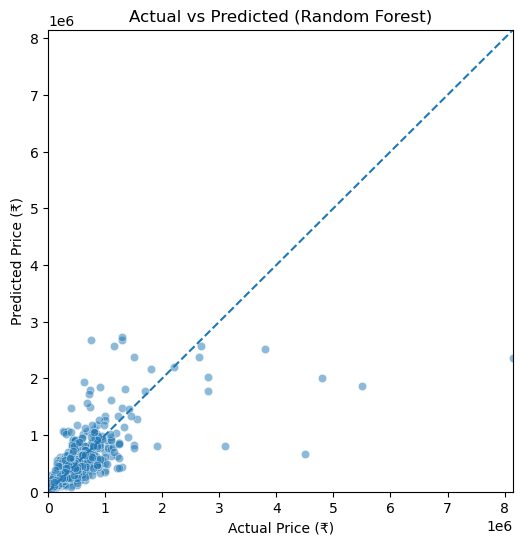

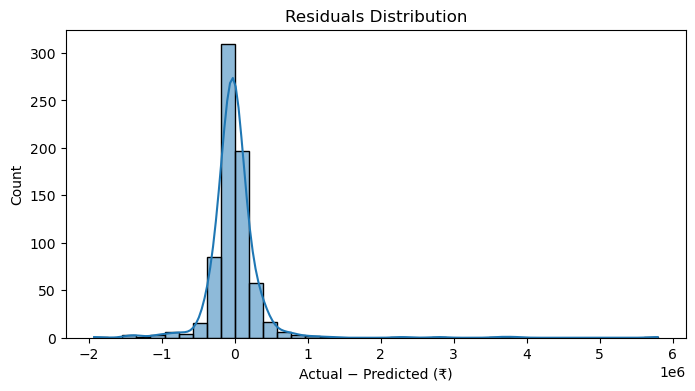

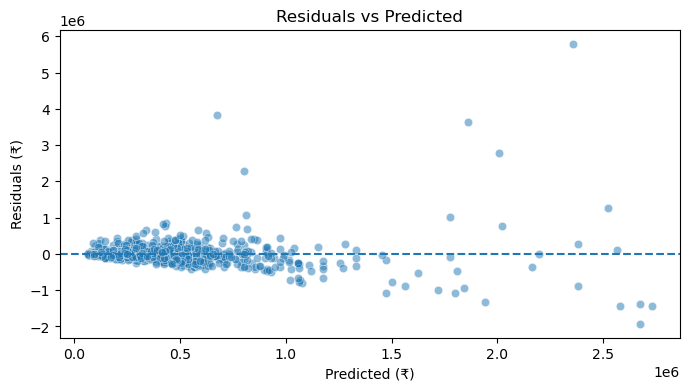

R²: 0.451  MAE: 194169.71  RMSE: 420376.68


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Parity plot: Actual vs Predicted
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
lims = [0, max(y_test.max(), y_pred_rf.max())]
plt.plot(lims, lims, linestyle="--")
plt.xlim(lims); plt.ylim(lims)
plt.xlabel("Actual Price (₹)"); plt.ylabel("Predicted Price (₹)")
plt.title("Actual vs Predicted (Random Forest)")
plt.show()

# Residuals
residuals = y_test - y_pred_rf
plt.figure(figsize=(8,4))
sns.histplot(residuals, bins=40, kde=True)
plt.title("Residuals Distribution"); plt.xlabel("Actual − Predicted (₹)")
plt.show()

plt.figure(figsize=(8,4))
sns.scatterplot(x=y_pred_rf, y=residuals, alpha=0.5)
plt.axhline(0, linestyle="--")
plt.title("Residuals vs Predicted"); plt.xlabel("Predicted (₹)"); plt.ylabel("Residuals (₹)")
plt.show()

# Quick metrics again
print(
    "R²:", round(r2_score(y_test, y_pred_rf),3),
    " MAE:", round(mean_absolute_error(y_test, y_pred_rf),2),
    " RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_rf)),2)
)


In [49]:
# Export cleaned dataset (for Power BI and documentation)
data.to_csv("car_cleaned.csv", index=False)

# Export test predictions (Actual vs Predicted)
test_idx = X_test.index
test_export = data.loc[test_idx].copy()
test_export["predicted_price"] = y_pred_rf
test_export["actual_price"] = y_test.values
test_export.to_csv("test_predictions.csv", index=False)

# Export feature importance
fi = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
fi.to_csv("feature_importance.csv")



## ✅ Conclusion

- **Top price drivers:** Car age, km driven, and transmission type were the most influential features.
- **Model used:** Random Forest Regressor (R² = 0.45, RMSE ≈ ₹4.2L)
- **Insights:**
  - Newer cars and low mileage significantly increase resale value.
  - Automatic transmission cars tend to sell for higher prices.
  - Petrol and Diesel cars dominate resale market; CNG/LPG have lower resale value.
- **Next Steps:** Integrate this data into a Power BI dashboard for visualization of model results and feature importance.
